### Práctica Cross Validation

#### Siguiendo el ejemplo de clasificación que venimos haciendo, se te pide en un jupyter notebook que evalúes con validación cruzada y configures los hiperparámetros de un modelo random forest y de un svc para encontrar los valores de los hiperparámetros óptimos.



#### Cargamos las librerías necesarias

In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Evaluación del modelo
# ==============================================================================
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *

#### Creamos y visualizamos el set de datos

In [3]:
# Datos
# ==============================================================================
df = pd.read_csv("ejemplo_dataset.csv")
df.head()


,X1,X2,y
0,2.526093,0.321050,0
1,0.366954,0.031462,0
2,0.768219,0.717486,0
3,0.693436,0.777194,0
4,-0.019837,0.867254,0


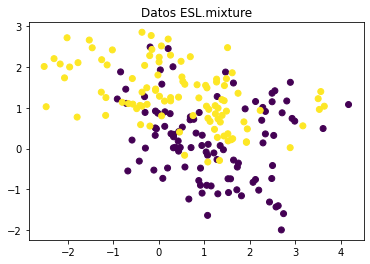

In [4]:
plt.scatter (df["X1"], df["X2"], c=df["y"])
plt.title("Datos ESL.mixture")

plt.show()

#### Dividimos los datos en el set de entrenamiento y de test.

In [5]:
X = df.drop(columns = 'y')
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.8,
                                        random_state = 1234,
                                    )

### Creamos y entrenamos el modelo SVC

In [6]:
%%time

#Le pasamos los parámetros a testar a GridsearchCV

model = GridSearchCV (estimator = SVC (random_state=42),  
              param_grid = {"kernel" : ("linear", "poly", "rbf"), "C": [1,  10, 100, 1000],"gamma" : [0.001, 0.01, 0.1, 1]},
              cv = 5,
                scoring = ("roc_auc"), n_jobs=-1)



model.fit (X_train, y_train)

Wall time: 25.5 s


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='roc_auc')

In [7]:
model.best_params_ # Visualizamos los parámetros seleccionados por la "Grid"

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [32]:
model1_best_score = model.best_score_ #Score roc_auc del modelo, que es la métrica elegida al crear la Grid, cuando se usan los parámetros seleccionados
model1_best_score

0.8340716911764705

In [9]:
y_pred = model.predict(X_test)

In [33]:
roc_auc_score1 = roc_auc_score(y_test, y_pred)
roc_auc_score1

0.860613810741688

#### Podemos intentar probar con el hiperparámetro C más bajo, ya que el elegido C = 1 está en uno de los extremos de las opciones que le hemos pasado a GridSearch, lo mismo ocurre con el valor de gamma

In [11]:
%%time

model = GridSearchCV (estimator = SVC (),  
              param_grid = {"kernel" : ("linear", "poly", "rbf"), "C": [0.1, 1,  10, 100],"gamma" : [0.01, 0.1, 1, 10]},
              cv = 5,
                scoring = ("roc_auc"), n_jobs=-1)



model.fit (X_train, y_train)

Wall time: 7min 9s


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='roc_auc')

In [12]:
model.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

#### Los parámetros elegidos siguen siendo los mismos que en la rejilla anterior

### Modelo Radom Forest

In [21]:
%%time

model2 = GridSearchCV (estimator = RandomForestClassifier (random_state= 42),
                      param_grid = {"criterion" : ("gini", "entropy"),"n_estimators": [5, 10, 50], "max_depth" : [3, 5, 10]},
                      scoring = "roc_auc",
                      n_jobs = -1)

model2.fit(X_train, y_train)

Wall time: 2.22 s


GridSearchCV(estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [3, 5, 10], 'n_estimators': [5, 10, 50]},
             scoring='roc_auc')

In [22]:
model2.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 10}

In [30]:
model2_best_score = model2.best_score_
model2_best_score

0.8438373161764705

In [24]:
y_pred2 = model2.predict(X_test)

In [31]:
roc_auc_score2 = roc_auc_score(y_test, y_pred2)
roc_auc_score2

0.8542199488491048

In [35]:
results = pd.DataFrame ({"roc_auc_train" : [model1_best_score, model2_best_score], 
                         "roc_auc_test" : [roc_auc_score1, roc_auc_score2] }, 
                        index = ["SVC", "RandomForest" ])

results.round(3)

,roc_auc_train,roc_auc_test
SVC,0.834,0.861
RandomForest,0.844,0.854


#### Como se observa en la tabla de la celda superior, con los datos de training el modelo Random Forest tiene un score superior, sin embargo, con los datos de test el modelo SVC tiene mejor rendimiento.